# MOwNiT
## Laboratorium 2 - Arytmetyka komputerowa


# Zadania

### Zadanie 1 (1p)

Porównać w języku Julia reprezentację bitową liczby 1/3 dla `Float16`, `Float32`, `Float64` oraz liczby, 
która jest inicjalizowana jako `Float16`, a potem rzutowana na `Float64`.

In [1]:
print("Float16: ", bitstring(Float16(1/3)))

Float16: 0011010101010101

In [2]:
print("Float32: ", bitstring(Float32(1/3)))

Float32: 00111110101010101010101010101011

In [3]:
print("Float64: ", bitstring(Float64(1/3)))

Float64: 0011111111010101010101010101010101010101010101010101010101010101

In [4]:
print("Float16 casted to Float64: ", bitstring(Float64(Float16(1/3))))

Float16 casted to Float64: 0011111111010101010101000000000000000000000000000000000000000000

### Zadanie 2 (2p)

Zbadać, jak zmienia się odległość między kolejnymi liczbami zmiennoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000000.0.

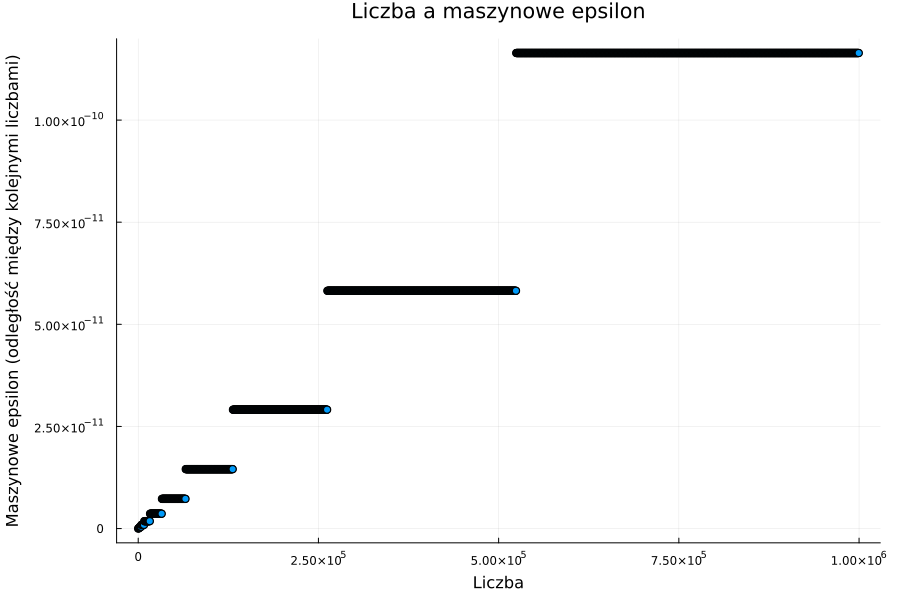

In [5]:
using Plots, Plots.PlotMeasures

scatter(
    eps, 
    1.0:500:1000000.0, 
    legend=false, 
    title="Liczba a maszynowe epsilon",
    xlabel="Liczba", 
    ylabel="Maszynowe epsilon (odległość między kolejnymi liczbami)", 
    size=(900, 600),
    margin=3mm
)

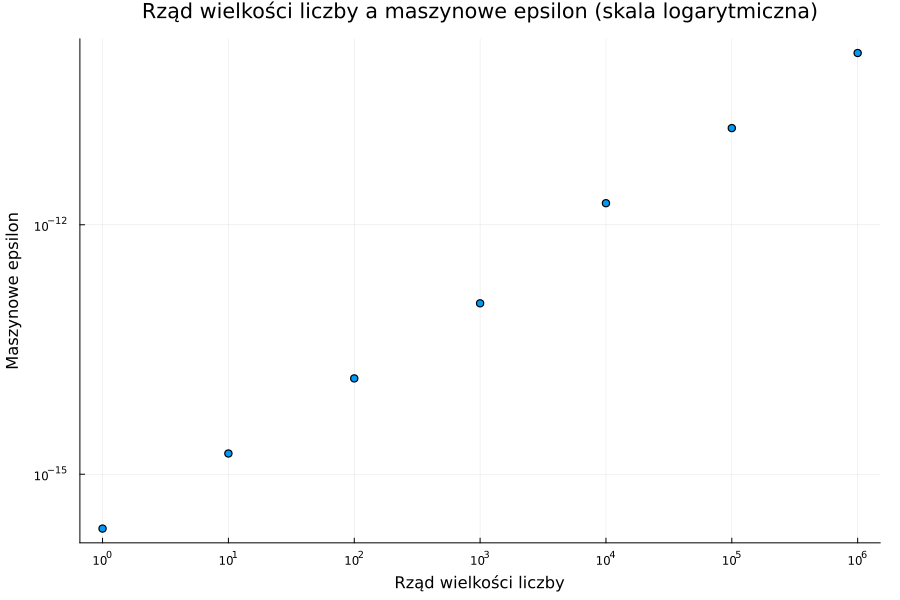

In [6]:
nums = []
epsilons = []

for i = 0:6
    push!(nums, 10^i)
    push!(epsilons, eps(Float64(10^i)))
end

scatter(
    nums, 
    epsilons, 
    legend=false, 
    title="Rząd wielkości liczby a maszynowe epsilon (skala logarytmiczna)",
    xlabel="Rząd wielkości liczby", 
    ylabel="Maszynowe epsilon", 
    xaxis=:log,
    yaxis=:log,
    size=(900, 600),
    margin=3mm
)

### Zadanie 3 (2p)

Jedną z bibliotek numerycznych, jaką dodatkowo będziemy używać na zajęciach jest <a href="http://www.gnu.org/software/gsl/gsl.html">GSL</a> (język C). Opis <a href="https://www.gnu.org/software/gsl/doc/html/usage.html"> jak używać </a>. Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

Kod załączyć jako komórka Markdown sformatowana jako C ([link](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#code)). Wynik także jako Markdown (kod albo fragment zrzutu ekranu).

## Kod programu

```c
#include <gsl/gsl_ieee_utils.h>
#include <stdio.h>
#include <math.h>

int main() {
    float num = 1e-35f;

    printf("|Postać IEEE-754|Znormalizowana?|\n");
    printf("|:---:|:---:|\n");

    while (num != 0) {
        char* is_normalized = fpclassify(num) == FP_NORMAL ? "TAK" : "NIE";  
        
        printf("|");
        gsl_ieee_printf_float(&num);
        printf("|%s|\n", is_normalized);

        num /= 2.0;
    }
    return 0;
}
```

## Wynik

|Postać IEEE-754|Znormalizowana?|
|:---:|:---:|
| 1.10101001010110100101110*2^-117|TAK|
| 1.10101001010110100101110*2^-118|TAK|
| 1.10101001010110100101110*2^-119|TAK|
| 1.10101001010110100101110*2^-120|TAK|
| 1.10101001010110100101110*2^-121|TAK|
| 1.10101001010110100101110*2^-122|TAK|
| 1.10101001010110100101110*2^-123|TAK|
| 1.10101001010110100101110*2^-124|TAK|
| 1.10101001010110100101110*2^-125|TAK|
| 1.10101001010110100101110*2^-126|TAK|
| 0.11010100101011010010111*2^-126|NIE|
| 0.01101010010101101001100*2^-126|NIE|
| 0.00110101001010110100110*2^-126|NIE|
| 0.00011010100101011010011*2^-126|NIE|
| 0.00001101010010101101010*2^-126|NIE|
| 0.00000110101001010110101*2^-126|NIE|
| 0.00000011010100101011010*2^-126|NIE|
| 0.00000001101010010101101*2^-126|NIE|
| 0.00000000110101001010110*2^-126|NIE|
| 0.00000000011010100101011*2^-126|NIE|
| 0.00000000001101010010110*2^-126|NIE|
| 0.00000000000110101001011*2^-126|NIE|
| 0.00000000000011010100110*2^-126|NIE|
| 0.00000000000001101010011*2^-126|NIE|
| 0.00000000000000110101010*2^-126|NIE|
| 0.00000000000000011010101*2^-126|NIE|
| 0.00000000000000001101010*2^-126|NIE|
| 0.00000000000000000110101*2^-126|NIE|
| 0.00000000000000000011010*2^-126|NIE|
| 0.00000000000000000001101*2^-126|NIE|
| 0.00000000000000000000110*2^-126|NIE|
| 0.00000000000000000000011*2^-126|NIE|
| 0.00000000000000000000010*2^-126|NIE|
| 0.00000000000000000000001*2^-126|NIE|00000000000000000000001*2^-126|NIE|

## Wyjaśnienie

Jako, że używamy zmiennych `float`, to mamy do czynienia z liczbami 32-bitowymi. Cecha zapisywana jest na 8 bitach, zatem jej wartości mieszczą się w przedziale $[-126; 127]$, ponieważ wartości $-127$ oraz $128$ zarezerwowane są dla specjalnych przypadków. Jeżeli reprezentowana liczba stanie się mniejsza niż $2^{-126}$, to zostaje ona zapisana w postaci zdenormalizowanej

### Zadanie 4 (3p)

Na przykładzie wybranego algorytmu niestabilnego numerycznie: 
1. Pokazać, że działa źle.
2. Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
3. Zademonstować wersję stabilną.

Nie wolno pokazywać przykładów z wykładu (lub bardzo podobnych)!

Wszystkie punkty przedstawić w postaci notatnika Julii.